In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import geopandas as gpd
import plotly.graph_objects as go

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Mind%20the%20Gender%20wage%20Gap/gap.csv',delimiter=';')

In [3]:
df

,location,indicator,subject,measure,frequency,time,value
0,AUS,WAGEGAP,EMPLOYEE,PC,A,1975,21.582.733.813
1,AUS,WAGEGAP,EMPLOYEE,PC,A,1976,20.754.716.981
2,AUS,WAGEGAP,EMPLOYEE,PC,A,1977,18.390.804.598
3,AUS,WAGEGAP,EMPLOYEE,PC,A,1978,19.791.666.667
4,AUS,WAGEGAP,EMPLOYEE,PC,A,1979,20
...,...,...,...,...,...,...,...
1205,EU27,WAGEGAP,EMPLOYEE,PC,A,2016,115.776.655.182.723
1206,EU27,WAGEGAP,EMPLOYEE,PC,A,2017,113.314.190.490.071
1207,EU27,WAGEGAP,EMPLOYEE,PC,A,2018,111.385.132.639.667
1208,EU27,WAGEGAP,EMPLOYEE,PC,A,2019,111.223.387.399.604


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   1210 non-null   object
 1   indicator  1210 non-null   object
 2   subject    1210 non-null   object
 3   measure    1210 non-null   object
 4   frequency  1210 non-null   object
 5   time       1210 non-null   int64 
 6   value      1210 non-null   object
dtypes: int64(1), object(6)
memory usage: 66.3+ KB


In [5]:
df['value']=df['value'].str.replace(".", "")
df['value'] = df['value'].str[:2]
df['value']=df['value'].astype(float)
df

,location,indicator,subject,measure,frequency,time,value
0,AUS,WAGEGAP,EMPLOYEE,PC,A,1975,21.0
1,AUS,WAGEGAP,EMPLOYEE,PC,A,1976,20.0
2,AUS,WAGEGAP,EMPLOYEE,PC,A,1977,18.0
3,AUS,WAGEGAP,EMPLOYEE,PC,A,1978,19.0
4,AUS,WAGEGAP,EMPLOYEE,PC,A,1979,20.0
...,...,...,...,...,...,...,...
1205,EU27,WAGEGAP,EMPLOYEE,PC,A,2016,11.0
1206,EU27,WAGEGAP,EMPLOYEE,PC,A,2017,11.0
1207,EU27,WAGEGAP,EMPLOYEE,PC,A,2018,11.0
1208,EU27,WAGEGAP,EMPLOYEE,PC,A,2019,11.0


In [6]:
df["value"].describe()

count    1210.000000
mean       31.995868
std        20.964324
min        -8.000000
25%        17.000000
50%        26.000000
75%        40.000000
max        99.000000
Name: value, dtype: float64

In [8]:
df["indicator"].unique()

array(['WAGEGAP'], dtype=object)

In [9]:
df["subject"].unique()

array(['EMPLOYEE', 'SELFEMPLOYED'], dtype=object)

In [10]:
df["measure"].unique()

array(['PC'], dtype=object)

In [11]:
df["frequency"].unique()

array(['A'], dtype=object)

In [16]:
df['location'].unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'BGR', 'CHL', 'COL', 'CRI', 'HRV', 'CYP',
       'EST', 'ISR', 'LVA', 'LTU', 'MLT', 'ROU', 'SVN', 'OECD', 'EU27'],
      dtype=object)

In [17]:
df["time"].unique()

array([1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 1996, 1970, 1971, 1972, 1973, 1974])

In [18]:
df=df.sort_values(by=['time'])
df1=df[df['time']>=2000]

In [20]:
value_revise= lambda x : x/10 if (x > 42 ) else x
df1['value_new']=df1['value'].apply(value_revise)
df1.describe()

,time,value,value_new
count,1013.000000,1013.000000,1013.000000
mean,2010.830207,32.568608,18.437808
std,5.399348,21.963194,10.713645
min,2000.000000,-8.000000,-8.000000
25%,2006.000000,16.000000,9.800000
50%,2011.000000,26.000000,17.000000
75%,2015.000000,41.000000,27.000000
max,2020.000000,99.000000,42.000000


In [21]:
fig = px.choropleth(df1,locations='location',color='value_new',scope='world',color_continuous_scale=px.colors.sequential.GnBu,
                    range_color=(-10,45),title='OECD Gender Wage Gap',height=700,animation_frame ='time'
    )
fig.show()

In [22]:
df_jap=df1[df1['location']=='JPN']
df_jap.head()

,location,subject,time,value,value_new
490,JPN,EMPLOYEE,2000,33.0,33.0
491,JPN,EMPLOYEE,2001,33.0,33.0
492,JPN,EMPLOYEE,2002,32.0,32.0
493,JPN,EMPLOYEE,2003,31.0,31.0
494,JPN,EMPLOYEE,2004,31.0,31.0


In [23]:
df_jap['ave_wage']=[38364,37982,37228,37254,37882,38879,38849,38742,38448,37950,38085,38699,38057,38103,37438,
                    37264,37810,37972,38461,39041,38514]
df_jap['female_labour']=[27525,27603,27335,27326,27369,27497,27612,27679,27707,27820,27828,27700,27693,28095,
                       28317,28517,28949,29435,30242,30722,30633]
df_jap['total_labour']=[67662,67518,66890,66663,66420,66505,66638,66843,66740,66500,66317,65955,65651,65927,
                       66087,66250,66785,67323,68491,69121,69022]
df_jap['female_labour_ratio']=df_jap['female_labour']/df_jap['total_labour']
df_jap=df_jap.drop('value',axis=1)

In [24]:
df_jap

,location,subject,time,value_new,ave_wage,female_labour,total_labour,female_labour_ratio
490,JPN,EMPLOYEE,2000,33.0,38364,27525,67662,0.406801
491,JPN,EMPLOYEE,2001,33.0,37982,27603,67518,0.408824
492,JPN,EMPLOYEE,2002,32.0,37228,27335,66890,0.408656
493,JPN,EMPLOYEE,2003,31.0,37254,27326,66663,0.409913
494,JPN,EMPLOYEE,2004,31.0,37882,27369,66420,0.412060
495,JPN,EMPLOYEE,2005,32.0,38879,27497,66505,0.413458
496,JPN,EMPLOYEE,2006,32.0,38849,27612,66638,0.414358
497,JPN,EMPLOYEE,2007,31.0,38742,27679,66843,0.414090
498,JPN,EMPLOYEE,2008,30.0,38448,27707,66740,0.415148
499,JPN,EMPLOYEE,2009,28.0,37950,27820,66500,0.418346


<AxesSubplot:>

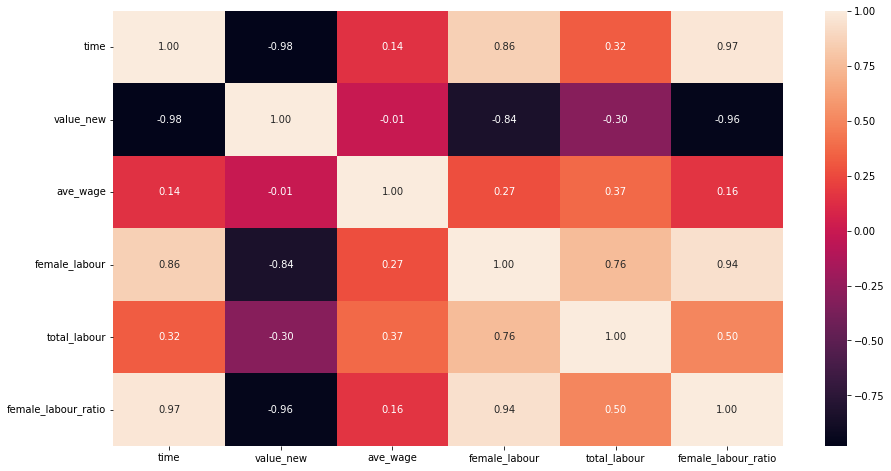

In [25]:
plt.figure(figsize = (15,8))
sns.heatmap(df_jap.corr(), annot=True,fmt='.2f')

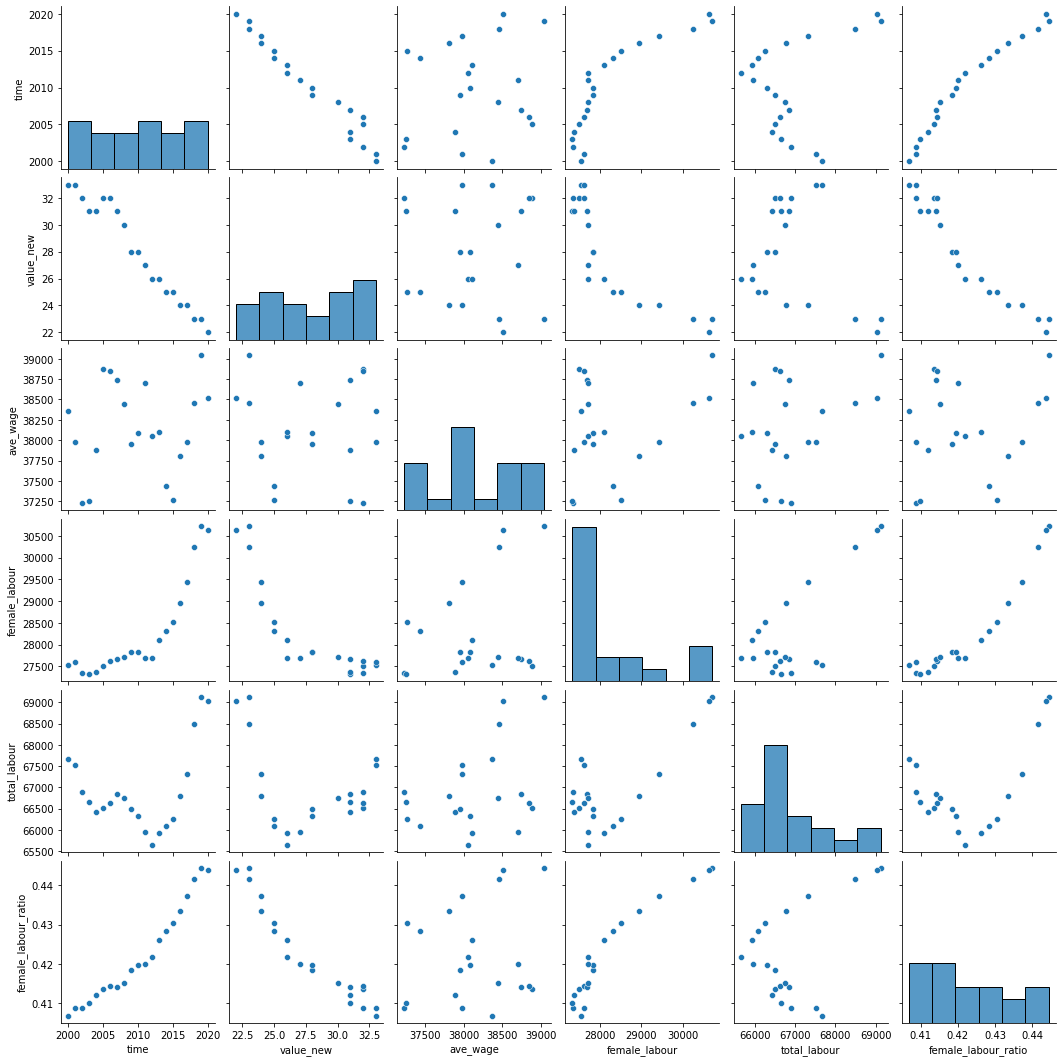

In [26]:
sns.pairplot(df_jap)

In [27]:
x = df_jap[['female_labour_ratio']]
y = df_jap[['value_new']]
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(x, y)

LinearRegression()

In [28]:
print('w1: %.3f' %model_lr.coef_)
print('w2: %.3f' %model_lr.intercept_)
print('y= %.3fx + %.3f' % (model_lr.coef_ , model_lr.intercept_))
print('R^2： ', model_lr.score(x, y))

w1: -292.367
w2: 151.376
y= -292.367x + 151.376
R^2：  0.9196531648601706


In [29]:
x=(11-151.376)/-292.367
x

0.48013626708896695

<AxesSubplot:xlabel='time'>

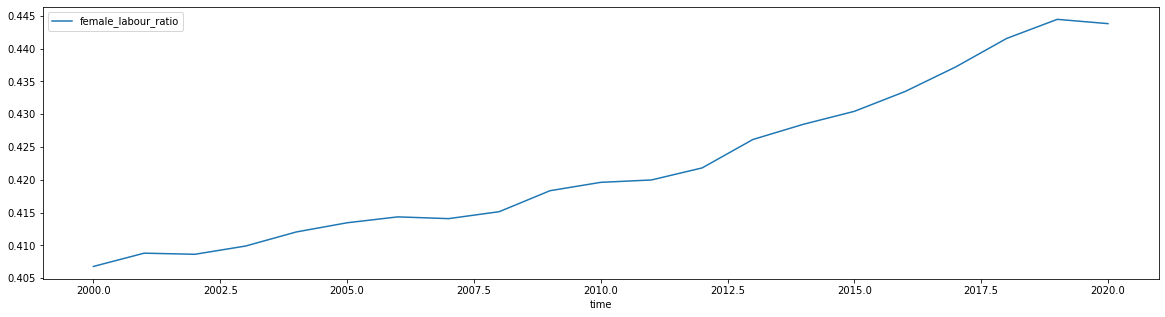

In [30]:
df_jap.plot(x='time',y='female_labour_ratio',figsize=(20,5))

<AxesSubplot:xlabel='time'>

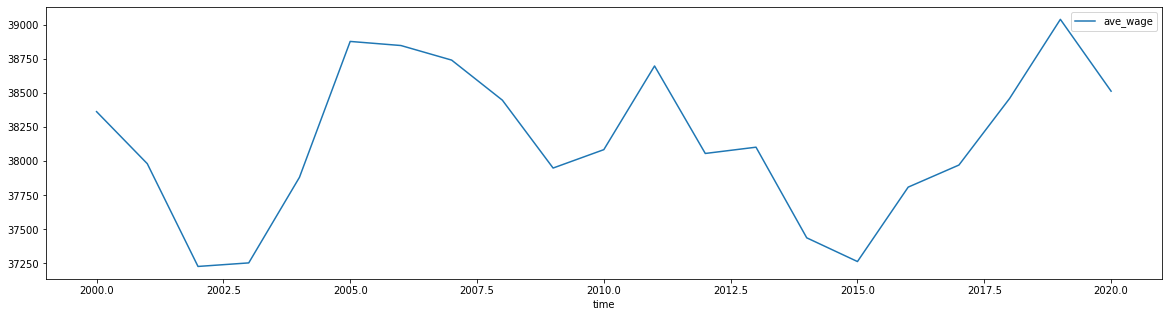

In [31]:
df_jap.plot(x='time',y='ave_wage',figsize=(20,5))